In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = os.listdir('../../input/video/')

In [3]:
names

['White_Knight_BlackBG.webm',
 'Black_Pawn_BlackBG3.webm',
 'Black_Pawn_WhiteBG2.webm',
 'Black_King_WhiteBG1.webm',
 'White_Knight_WhiteBG3.webm',
 'Black_Rook_BlackBG.webm',
 'Black_Rook_WhiteBG1.webm',
 'Black_Rook_BlackBG2.webm',
 'White_Rook_WhiteBG1.webm',
 'Black_Knight_BlackBG1.webm',
 'White_Pawn_BlackBG1.webm',
 'Black_King_WhiteBG.webm',
 'Black_Bishop_WhiteBG3.webm',
 'Black_Bishop_BlackBG.webm',
 'White_King_BlackBG1.webm',
 'White_Queen_WhiteBG.webm',
 'Black_Knight_WhiteBG3.webm',
 'Black_Rook_WhiteBG.webm',
 'Black_Knight_WhiteBG.webm',
 'Black_Knight_WhiteBG1.webm',
 'White_Rook_BlackBG1.webm',
 'Black_Pawn_WhiteBG.webm',
 'Black_Knight_BLackBG.webm',
 'White_King_WhiteBG1.webm',
 'Black_King_BlackBG.webm',
 'Black_Pawn_GreenBG.webm',
 'White_Knight_WhiteBG1.webm',
 'White_Bishop_BlackBG.webm',
 'Black_Knight_WhiteBG2.webm',
 'Black_Pawn_WhiteBG1.webm',
 'Black_Queen_BlackBG.webm',
 'White_Pawn_WhiteBG1.webm',
 'White_Rook_BlackBG2.webm',
 'White_Pawn_WhiteBG.webm',
 '

In [4]:
time()

1500393035.131952

In [5]:
def divideVideo(filename, outputname, color):
    print('outputname: '+outputname)
    a, b, c = os.popen3('ffmpeg -i ../../input/video/%s' % (filename))
    out = c.read()
    dp = out.index('Duration: ')
    duration = out[dp+10:dp+out[dp:].index(",")]
    hh, mm, ss = map(float, duration.split(':'))
    total = (hh*60+mm)*60+ss
    for i in xrange(int(total)):
        t = i
        p = int(time())
        print(t)
        os.system("ffmpeg -i ../../input/video/%s -ss %i ../../input/images/%s/frame_%s_%i.png" % (
                filename, t, color, outputname, p))

In [ ]:
for idx, val in enumerate(names):
    print(val)
#     print(val.split("_"))
    color, piece, _ = val.split("_")
    divideVideo(val, "_".join(val.split("_")[:2]), color)

White_Knight_BlackBG.webm
outputname: White_Knight


/home/fjcamillo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: os.popen3 is deprecated.  Use the subprocess module.
  app.launch_new_instance()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
Black_Pawn_BlackBG3.webm
outputname: Black_Pawn
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
Black_Pawn_WhiteBG2.webm
outputname: Black_Pawn
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
Black_King_WhiteBG1.webm
outputname: Black_King
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


# Convert Images into ndarrays and number values

In [11]:
white_images = os.listdir('../../input/images/White')
black_images = os.listdir('../../input/images/Black')

In [41]:
#Let's take a peek at the image filenames
white_images[0]

'frame_White_King_1499789384.png'

In [12]:
#Number of images per folder on the color of the pieces
print('Images for White Pieces: {}'.format(len(white_images)))
print('Images for Black Pieces: {}'.format(len(black_images)))

Images for White Pieces: 357
Images for Black Pieces: 505


In [24]:
#Open the image using PIL.Image
test = Image.open('../../input/images/White/'+white_images[0])

In [39]:
np.array(test).shape

(480, 640, 3)

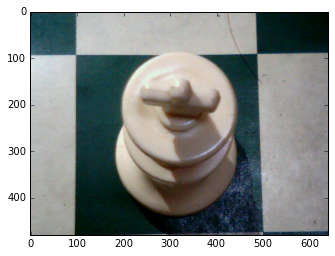

In [27]:
#Sample Image
plt.imshow(test)

### Data Augmentation

In [77]:
def convert_images(filename, size, name, key, counter):
    img = Image.open(filename)
    img = img.resize(size)
    
#     timestamp = str(int(time()))
    timestamp = counter
    img.save('../../input/images/modified/{1}/resized_{1}_{0}_{2}.png'.format(name, key, timestamp))
    rotate45 = img.rotate(45)
    rotate45.save('../../input/images/modified/{1}/rotate45_{1}_{0}_{2}.png'.format(name, key, timestamp))
    rotate90 = img.rotate(90)
    rotate90.save('../../input/images/modified/{1}/rotate90_{1}_{0}_{2}.png'.format(name, key, timestamp))
    flip = img.transpose(Image.FLIP_LEFT_RIGHT)
    flip.save('../../input/images/modified/{1}/flip_{1}_{0}_{2}.png'.format(name, key, timestamp))

In [78]:
def complete_name(main_path, added, actual_name):
    complete = main_path + added +'/'+ actual_name
    return complete

In [79]:
counter = 0
for whi in white_images:
    print(counter)
    white_piece = whi.split('_')
    complete_file_location = '../../input/images/'
    size = (48, 48)
    complete_white = complete_name(complete_file_location, white_piece[1], whi)
    print(complete_white)    
    convert_images(complete_white, size, white_piece[2], white_piece[1], counter)
    counter += 1

0
../../input/images/White/frame_White_King_1499789384.png
1
../../input/images/White/frame_White_Knight_1499788112.png
2
../../input/images/White/frame_White_Queen_1499789652.png
3
../../input/images/White/frame_White_King_1499789333.png
4
../../input/images/White/frame_White_Pawn_1499788914.png
5
../../input/images/White/frame_White_King_1499789457.png
6
../../input/images/White/frame_White_Rook_1499788620.png
7
../../input/images/White/frame_White_Pawn_1499788831.png
8
../../input/images/White/frame_White_King_1499789555.png
9
../../input/images/White/frame_White_Knight_1499788110.png
10
../../input/images/White/frame_White_King_1499789509.png
11
../../input/images/White/frame_White_Pawn_1499788945.png
12
../../input/images/White/frame_White_Rook_1499788698.png
13
../../input/images/White/frame_White_Rook_1499788614.png
14
../../input/images/White/frame_White_Knight_1499788107.png
15
../../input/images/White/frame_White_Knight_1499788120.png
16
../../input/images/White/frame_White_Q

In [80]:
counter = 0
for bla in black_images:
    black_piece = bla.split('_')
    complete_file_location = '../../input/images/'
    size = (48, 48)
    complete_black = complete_name(complete_file_location, black_piece[1], bla)
    print(complete_black)
    convert_images(complete_black, size, black_piece[2], black_piece[1], counter)
    counter += 1

../../input/images/Black/frame_Black_Pawn_1499788025.png
../../input/images/Black/frame_Black_Bishop_1499789100.png
../../input/images/Black/frame_Black_Bishop_1499789192.png
../../input/images/Black/frame_Black_Rook_1499788505.png
../../input/images/Black/frame_Black_Knight_1499788719.png
../../input/images/Black/frame_Black_King_1499788986.png
../../input/images/Black/frame_Black_King_1499788991.png
../../input/images/Black/frame_Black_Rook_1499788383.png
../../input/images/Black/frame_Black_King_1499788068.png
../../input/images/Black/frame_Black_King_1499788973.png
../../input/images/Black/frame_Black_Bishop_1499789072.png
../../input/images/Black/frame_Black_Knight_1499788716.png
../../input/images/Black/frame_Black_Rook_1499788219.png
../../input/images/Black/frame_Black_Rook_1499788521.png
../../input/images/Black/frame_Black_King_1499788998.png
../../input/images/Black/frame_Black_King_1499788965.png
../../input/images/Black/frame_Black_Rook_1499788604.png
../../input/images/Bl

### Data Labelling and conversion of Data to ndArrays

In [2]:
#Check the total number of images
print(len(os.listdir('../../input/images/modified/White')))
print(len(os.listdir('../../input/images/modified/Black')))

1428
2020


In [3]:
#Division of training and testing set
print('number of training set: \t' + str((2020+1428)*.75))
print('number of test set: \t\t' + str((2020+1428)*.25))

number of training set: 	2586.0
number of test set: 		862.0


In [4]:
#Sample Image Name
sample = os.listdir('../../input/images/modified/Black')[0]
sample

'rotate90_Black_Rook_474.png'

In [5]:
#Test Image conversion to ndarray
test_image = np.array(Image.open('../../input/images/modified/Black/{}'.format(sample)))

In [6]:
#See information about the image
test_image.shape

(48, 48, 3)

In [7]:
#Test Image sort by Channel
timage = []
for i in range(48):
    for j in range(48):
        timage.append(test_image[i][j][0])

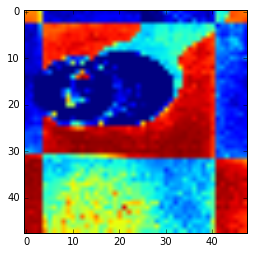

In [8]:
plt.imshow(np.array(timage).reshape(48, 48))

### Dataset

In [2]:
#Dataset Schema
chess12 = {
    'train_images': [],
    'test_images': [],
    'train_labels': [],
    'test_labels': [],
    'one_hot_train_labels': [],
    'one_hot_test_labels': [],
    'metadata': {
        '0': 'Black King',
        '1': 'White Pawn',
        '2': 'White Bishop',
        '3': 'White Knight',
        '4': 'White Rook',
        '5': 'White Queen',
        '6': 'White King',
        '7': 'Black Pawn',
        '8': 'Black Bishop',
        '9': 'Black Knight',
        '10': 'Black Rook',
        '11': 'Black Queen'
    }
}

In [3]:
#Classes of the images
classes = {
    'black': {
        'pawn': 7,
        'bishop': 8,
        'knight': 9,
        'rook': 10,
        'queen': 11,
        'king': 0
    },
    'white': {
        'pawn': 1,
        'bishop': 2,
        'knight': 3,
        'rook': 4,
        'queen': 5,
        'king': 6
    }
}

In [4]:
#Function to label images:
def label_image(filename):
    name = filename.split("_")
    label = classes[name[1].lower()][name[2].lower()]
    return label

In [5]:
#Sort images by channel and lay them out like the cifar10 dataset
def arrange_dataset(array):
    final = []
    timage = []
    for k in range(3):
        for i in range(48):
            for j in range(48):
                timage.append(np.array(array[i][j][k]))
        final.append(timage)
        timage = []
    return np.array(final)

In [6]:
#Convert all images of the black pieces into ndarray and the same time append the correct label
# black_list = []
black_images = os.listdir('../../input/images/modified/Black/')
for bl in black_images:
    img = np.array(Image.open('../../input/images/modified/Black/{}'.format(bl)))
    converted = arrange_dataset(img)
    labels = label_image('../../input/images/modified/Black/{}'.format(bl))
    for conv in converted:
        chess12['train_images'].append(conv)
    for idd in range(len(converted)):
        chess12['train_labels'].append(labels)

In [7]:
white_images = os.listdir('../../input/images/modified/White/')
for wh in white_images:
    img = np.array(Image.open('../../input/images/modified/White/{}'.format(wh)))
    converted = arrange_dataset(img)
    labels = label_image('../../input/images/modified/White/{}'.format(wh))
    for conv in converted:
        chess12['train_images'].append(conv)
    for idd in range(len(converted)):
        chess12['train_labels'].append(labels)

### Dividing the gathered data into training and testing

In [8]:
def manual_train_test_split(feature, label, percent):
    train_image = []
    train_label = []
    test_image = []
    test_label = []
    
    label_indexes = np.linspace(0, len(label), num=len(label)*percent, dtype=int)
    print(label_indexes)
    feature_indexes = [3*ind for ind in label_indexes]
    
    #Append tests
    for i in range(len(label)):
        if i in label_indexes:
            print(i)
            test_label.append(label[i])
        else:
            train_label.append(label[i])
    
    #Append train
    
    for j in range(len(feature))[::3]:
        if j in feature_indexes:
            for p in range(3):
                test_image.append(feature[j+p])
        else:
            print('el: {}'.format(j))
            for o in range(3):
                train_image.append(feature[j+o])
        
    return np.array(train_image), np.array(train_label).reshape(1, -1), np.array(test_image), np.array(test_label).reshape(1, -1)

In [9]:
chess12['train_images'], chess12['train_labels'], chess12['test_images'], chess12['test_labels'] = manual_train_test_split(chess12['train_images'], chess12['train_labels'], .3)

/home/fjcamillo/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


[    0     3     6 ..., 10337 10340 10344]
0
3
6
10
13
16
20
23
26
30
33
36
40
43
46
50
53
56
60
63
66
70
73
76
80
83
86
90
93
96
100
103
106
110
113
116
120
123
126
130
133
136
140
143
146
150
153
156
160
163
166
170
173
176
180
183
186
190
193
196
200
203
206
210
213
216
220
223
226
230
233
236
240
243
246
250
253
256
260
263
266
270
273
276
280
283
286
290
293
296
300
303
306
310
313
316
320
323
326
330
333
336
340
343
346
350
353
356
360
363
366
370
373
376
380
383
386
390
393
396
400
403
406
410
413
416
420
423
426
430
433
436
440
443
446
450
453
456
460
463
466
470
473
476
480
483
486
490
493
496
500
503
506
510
513
516
520
523
526
530
533
536
540
543
546
550
553
556
560
563
566
570
573
576
580
583
586
590
593
596
600
603
606
610
613
616
620
623
626
630
633
636
640
643
646
650
653
656
660
663
666
670
673
676
680
683
686
690
693
696
700
703
706
710
713
716
720
723
726
730
733
736
740
743
746
750
753
756
760
763
766
770
773
776
780
783
786
790
793
796
800
803
806
810
813
816
820
82

In [10]:
chess12['train_images'].shape

(7242, 2304)

In [11]:
chess12['test_images'].shape

(3102, 2304)

In [12]:
chess12['train_labels'].shape

(1, 7242)

In [13]:
chess12['test_labels'].shape

(1, 3102)

### Create One Hot Encoded Version of the labels

In [18]:
chess12['one_hot_train_labels'] = [[1 if label==real else 0 for real in range(12)] for label in chess12['train_labels'][0]]
chess12['one_hot_test_labels'] = [[1 if label==real else 0 for real in range(12)] for label in chess12['test_labels'][0]]

In [19]:
chess12['train_labels'][0]

array([10, 10,  0, ...,  4,  4,  4])

In [20]:
chess12['one_hot_train_labels'][0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

### Save the dataset into a file

In [21]:
import pickle